**Import the librairies and load the data**

In [1]:
# import the librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [3]:
print('data shape:', df.shape)

data shape: (4269, 13)


In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**EDA**

In [5]:
print('Data info:')
df.info()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
 # find the number of null values
 df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [7]:
# Inspect raw columns
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
# remove white spaces in columns names
df.columns = df.columns.str.strip()

In [9]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [10]:
print(f"distribution of 'loan approval status'")
print(df['loan_status'].value_counts())
print(df['loan_status'].value_counts(normalize=True))

distribution of 'loan approval status'
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64


**Create visuals**

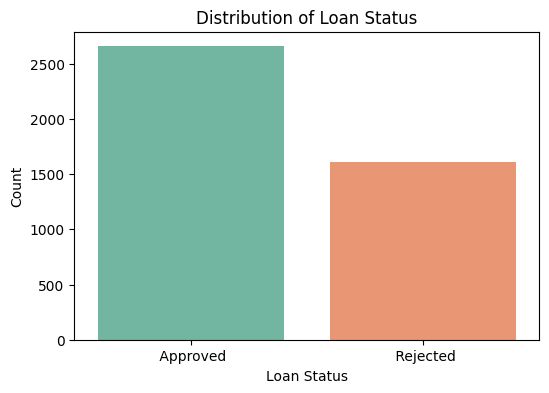

In [11]:
# distribution of loan status
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df, palette='Set2')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

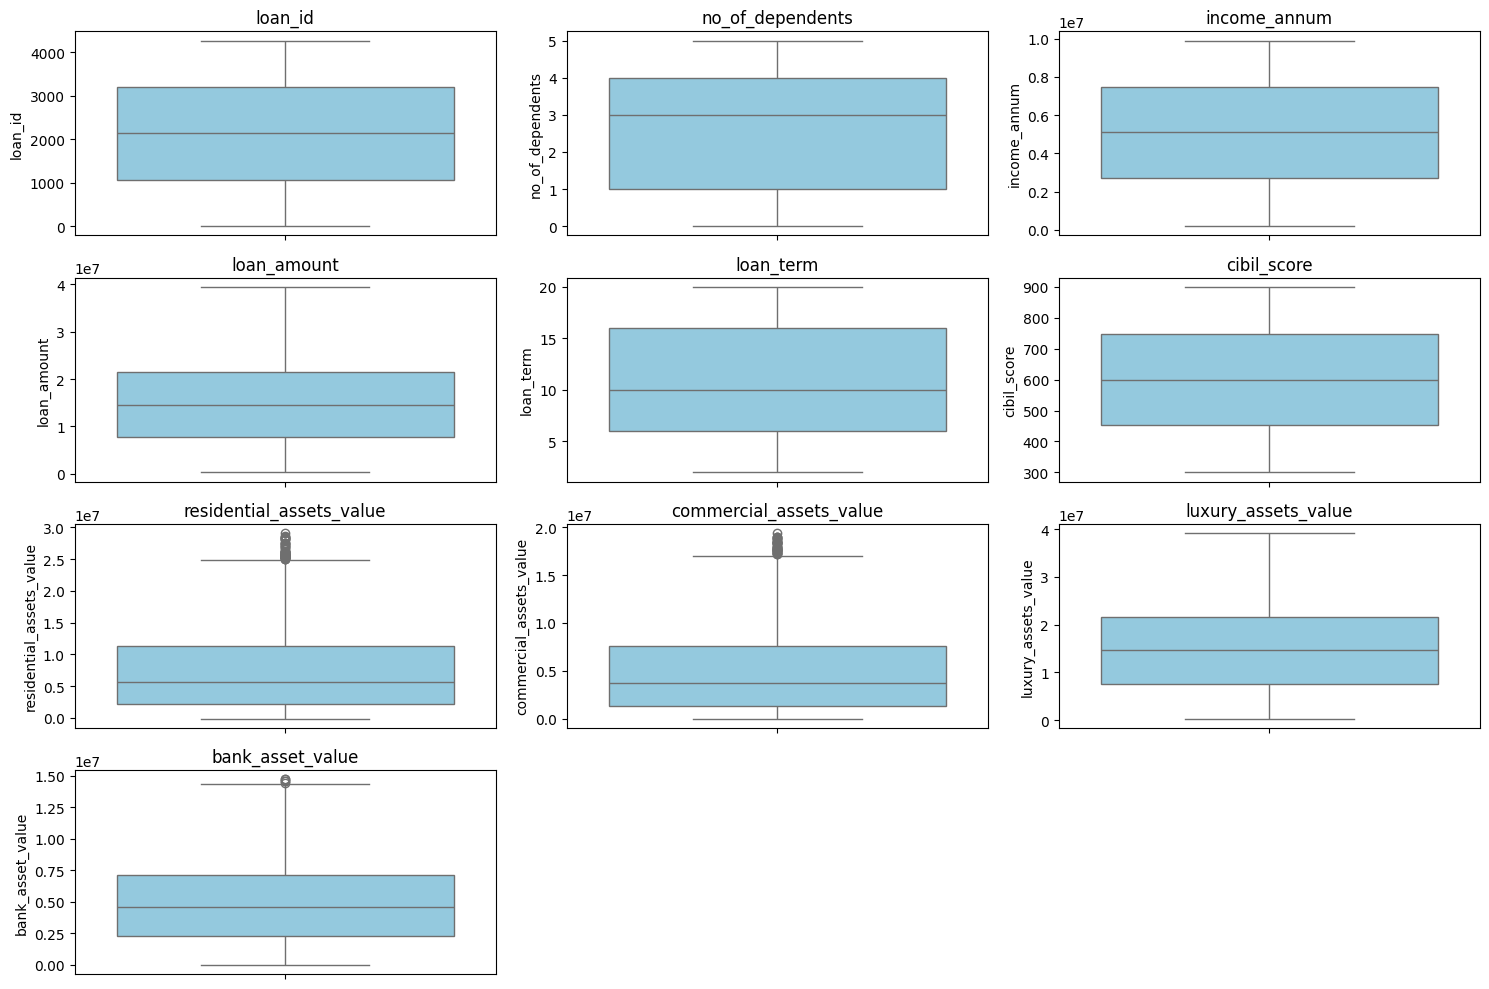

In [12]:
# boxplots
plt.figure(figsize=(15,10))

for i, col in enumerate(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score','residential_assets_value',
                         'commercial_assets_value','luxury_assets_value', 'bank_asset_value'], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt

<function matplotlib.pyplot.show(close=None, block=None)>

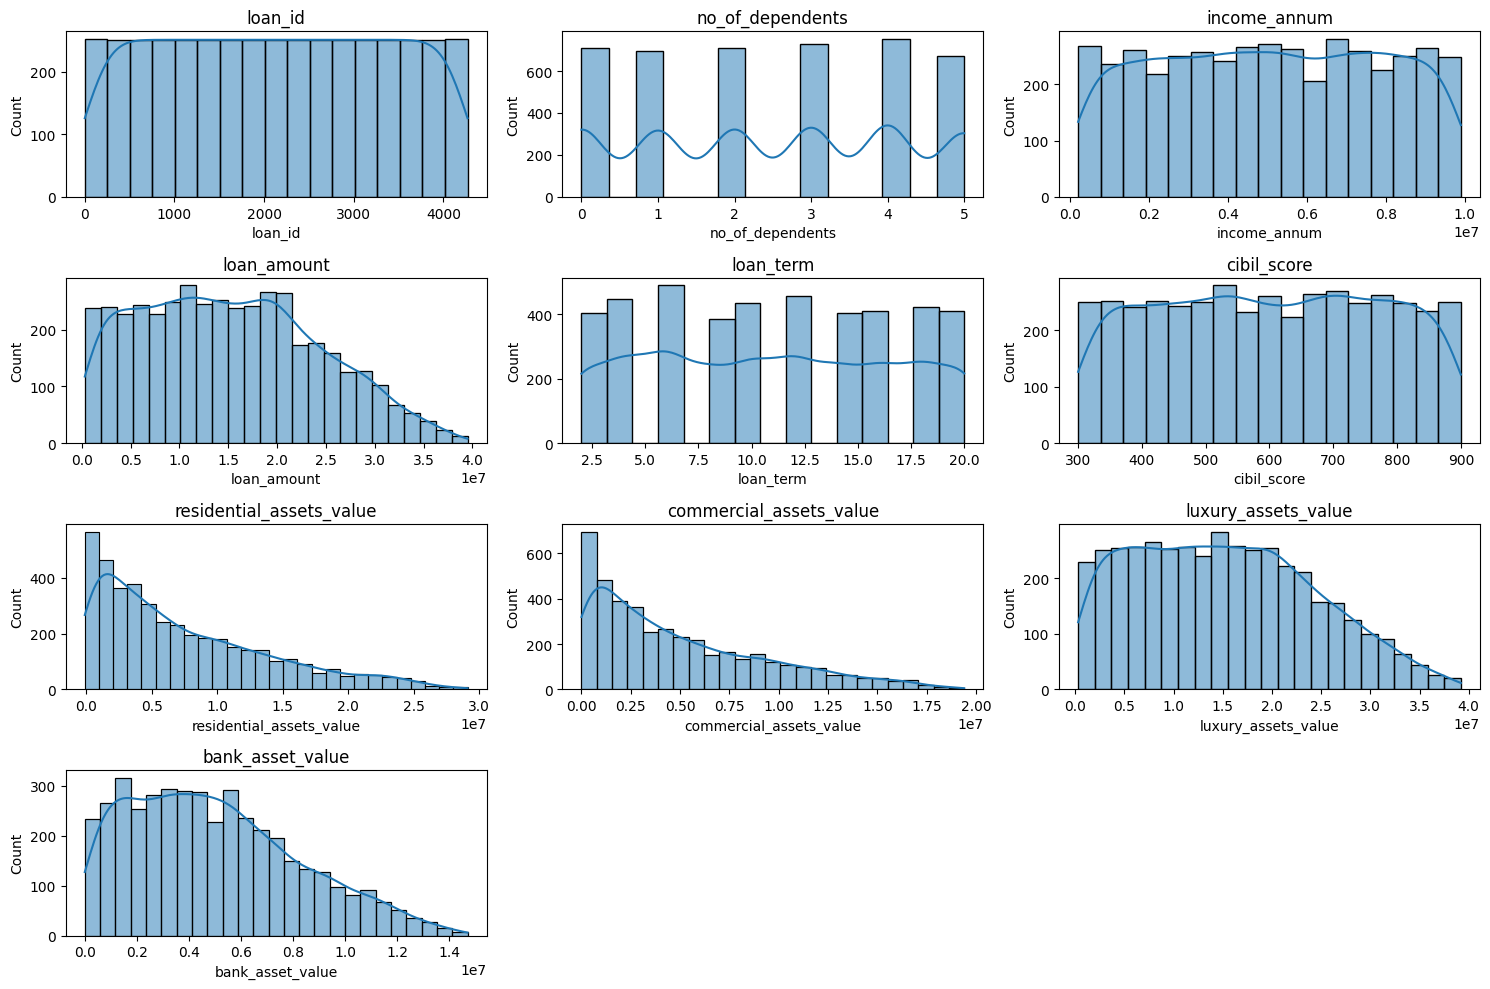

In [13]:
# distribution graphs of numerical columns
plt.figure(figsize=(15,10))

for i, col in enumerate(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'], 1):
  plt.subplot(4, 3, i)
  sns.histplot(df[col], kde=True, palette='Set2')
  plt.title(col)
  plt.xlabel(col)

plt.tight_layout()
plt.show

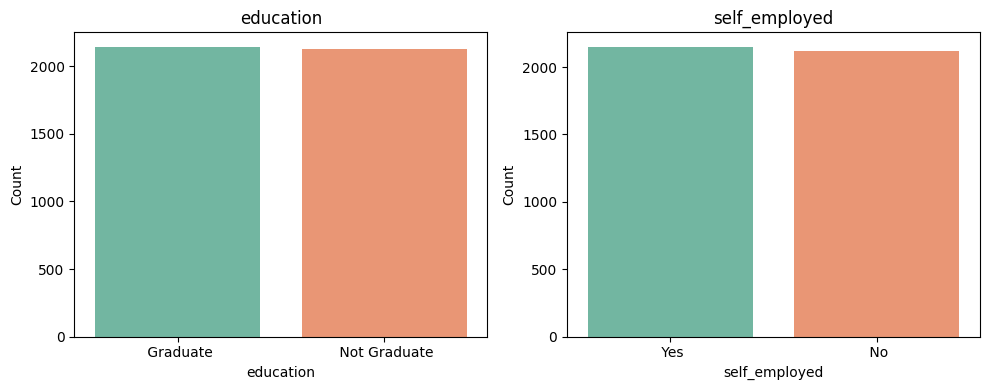

In [14]:
cols = ["education", "self_employed"]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for i, col in enumerate(cols):
    counts = df[col].value_counts(dropna=False)
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette="Set2")
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
fig.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

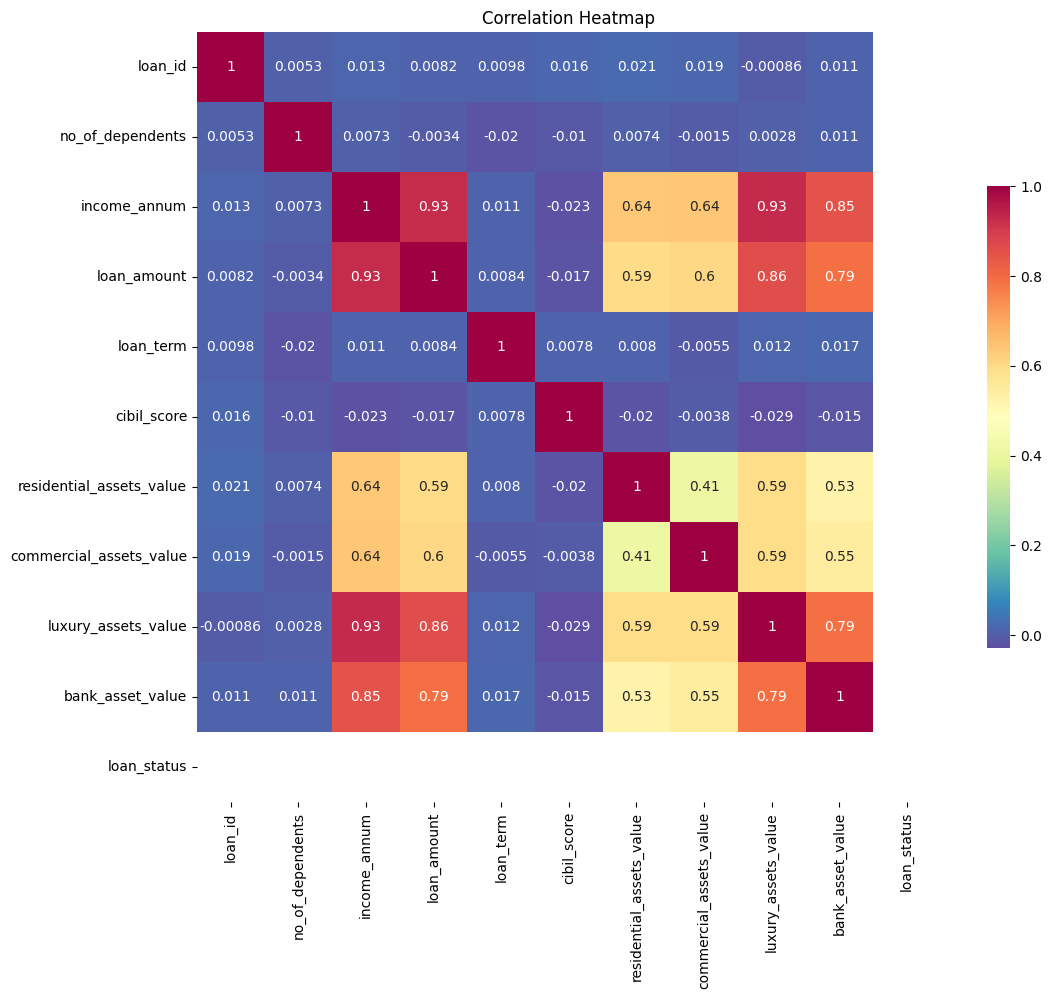

In [15]:
# correlation heatmap
num_cols = ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']
corr = pd.concat([df[num_cols], df['loan_status'].map({'Approved': 1, 'Rejected': 0})],  axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='Spectral_r', cbar_kws={'shrink': 0.6})
plt.title('Correlation Heatmap')
plt.show

In [16]:
df['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [17]:
# normalize string in 'loan status': strip spaces, collapse whitespace, unify case
df['loan_status'] = df['loan_status'].str.strip()
df['loan_status'] = df['loan_status'].str.replace(r"\s+", " ", regex=True)
df['loan_status'] = df['loan_status'].str.title()

**Preprocessing**

In [18]:
# remap loan status
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

In [19]:
df['loan_status'].unique()

array([1, 0])

In [20]:
# split dataset into train and test sets
X = df.drop(columns=['loan_id', 'loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# preprocessor
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['education', 'self_employed']
preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [21]:
print(y)

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64


In [22]:
print(X)

      no_of_dependents      education self_employed  income_annum  \
0                    2       Graduate            No       9600000   
1                    0   Not Graduate           Yes       4100000   
2                    3       Graduate            No       9100000   
3                    3       Graduate            No       8200000   
4                    5   Not Graduate           Yes       9800000   
...                ...            ...           ...           ...   
4264                 5       Graduate           Yes       1000000   
4265                 0   Not Graduate           Yes       3300000   
4266                 2   Not Graduate            No       6500000   
4267                 1   Not Graduate            No       4100000   
4268                 1       Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8 

**Modeling**

predicting with logistic regression, RandomizedSearchCV and SMOTE

In [30]:
# logistic regression, RandomizedSearchCV and SMOTE
log_pipe = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", LogisticRegression(random_state=42, max_iter=1000))
])

log_param_grid = {
    "classifier__C": np.logspace(-4, 4, 20),
    "classifier__penalty": ["l1", "l2"],
    "classifier__solver": ["liblinear", "saga"],
}

log_search = RandomizedSearchCV(
    estimator=log_pipe,
    param_distributions=log_param_grid,
    n_iter=20,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1,
    verbose=1,
)

log_search.fit(X_train, y_train)
best_log = log_search.best_estimator_
print("Best Logistic Params:", log_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Logistic Params: {'classifier__solver': 'saga', 'classifier__penalty': 'l1', 'classifier__C': np.float64(0.23357214690901212)}


In [32]:
# evaluate
y_pred_log = best_log.predict(X_test)
y_proba_log = best_log.predict_proba(X_test)[:, 1]
print("\nLogistic Regression (SMOTE and Tuned)")
print(classification_report(y_test, y_pred_log, target_names=['Rejected', 'Approved']))
log_auc = roc_auc_score(y_test, y_proba_log)          # <-- fixed name
print(f"ROC-AUC: {log_auc:.4f}")


Logistic Regression (SMOTE and Tuned)
              precision    recall  f1-score   support

    Rejected       0.88      0.92      0.90       323
    Approved       0.95      0.93      0.94       531

    accuracy                           0.93       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854

ROC-AUC: 0.9734


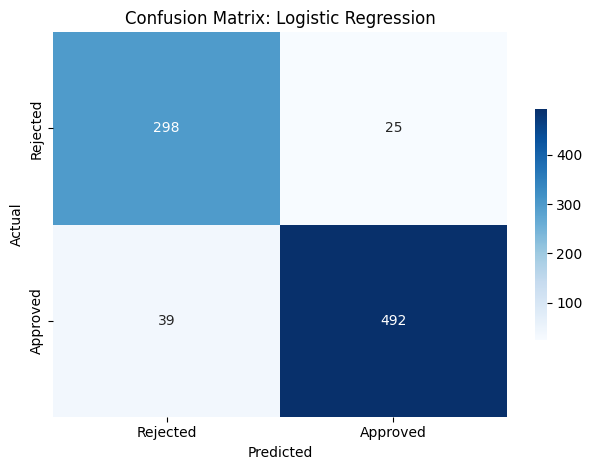

In [33]:
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            cbar_kws={'shrink': 0.6},
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [34]:
# Decision tree with Random search and SMOTE
dt_pipe = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

dt_param_grid = {
    "classifier__max_depth": [3, 5, 7, 10, 15, None],
    "classifier__min_samples_split": [2, 5, 10, 20],
    "classifier__min_samples_leaf": [1, 2, 5, 10],
    "classifier__criterion": ["gini", "entropy"],
}

dt_random_search = RandomizedSearchCV(
    estimator=dt_pipe,
    param_distributions=dt_param_grid,
    n_iter=30,
    cv=5,
    scoring="f1",
    random_state=42,
    n_jobs=-1,
    verbose=1,
)

dt_random_search.fit(X_train, y_train)
best_dt = dt_random_search.best_estimator_
print("Best Decision Tree Params:", dt_random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Decision Tree Params: {'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__criterion': 'entropy'}


In [35]:
# evaluate
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]
print("\nDecision Tree (SMOTE and Tuned)")
print(classification_report(y_test, y_pred_dt, target_names=['Rejected', 'Approved']))  # <-- fixed y_pred_dt
dt_auc = roc_auc_score(y_test, y_proba_dt)
print(f"ROC-AUC: {dt_auc:.4f}")


Decision Tree (SMOTE and Tuned)
              precision    recall  f1-score   support

    Rejected       0.97      0.97      0.97       323
    Approved       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

ROC-AUC: 0.9824


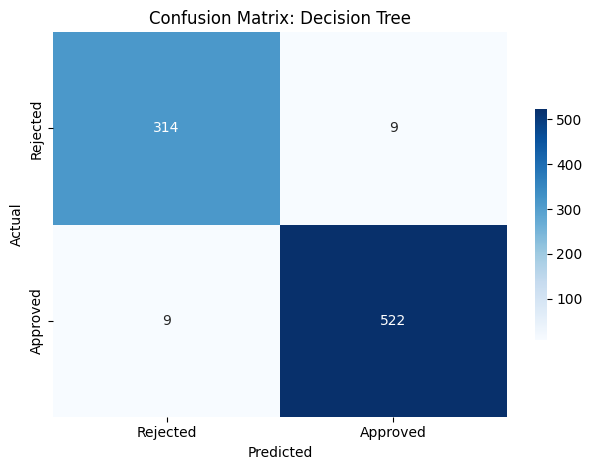

In [36]:
cm_dt = confusion_matrix(y_test, y_pred_dt)          # <-- fixed cm for DT
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            cbar_kws={'shrink': 0.6},
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**Compare the models and determine feature importance**

In [37]:
# compare the models
models = pd.DataFrame({
    'Model': ["Logistic Regression", "Decision Tree"],
    'ROC-AUC': [log_auc, dt_auc],                     # <-- now both exist
    'Best Params': [log_search.best_params_, dt_random_search.best_params_],
})

print('\nModel Comparison')
print(models)


Model Comparison
                 Model   ROC-AUC  \
0  Logistic Regression  0.973361   
1        Decision Tree  0.982389   

                                         Best Params  
0  {'classifier__solver': 'saga', 'classifier__pe...  
1  {'classifier__min_samples_split': 5, 'classifi...  


In [38]:
# feature importance
# extract feature names after one-hot encoder
ohe = best_dt.named_steps['preprocessor'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(categorical_features)
feature_names = numeric_features + list(cat_features)

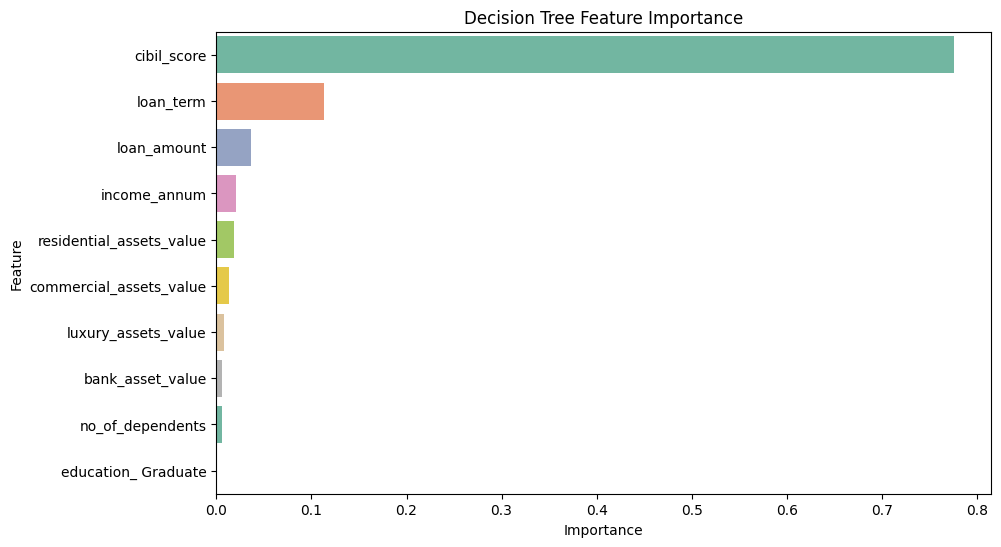

In [39]:
# coefficients/Importance
if hasattr(best_dt.named_steps['classifier'], 'coef_'):
  importances = np.abs(best_dt.named_steps['classifier'].coef_[0])
  title = 'Logistic Regression Feature Importance'
else:
  importances = best_dt.named_steps['classifier'].feature_importances_
  title = 'Decision Tree Feature Importance'

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='Set2')
plt.title(title)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()